# План:

1. Иерархический кластерный анализ
2. Метод k-means
3. DBSCAN

# Важно!
Классификация и кластеризация не тождественны:

* классификация - мы заранее знаем, какие классы в наших данных есть, и пытаемся новые объекты рассортировать по этим классам

* кластеризация - мы пытаемся найти новые классы объектов, заранее не знаем, какие и сколько их (модел  обучается без учителя, выполняет задание: раздели на кучки похожих)

In [ ]:
# все импорты
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing, metrics
from sklearn.cluster import KMeans, DBSCAN

# Кластеризация

Кластерный анализ использутся, когда мы хотим найти схожие объекты в наших данных

* Кластерный анализ разбивает набор объектов на группы

* Попутно определяется число групп

Алгоритмов существует больше, мы посмотрим 3 основных:

* иерархический кластерный анализ: заранее неизвестно число кластеров (групп, на которые разбивается набор объектов) - будем смотреть по локтевой диаграмме и дендрограмме

* k-means: нужно определить и указать оптимальное количество кластеров да начала работы алгоритма

* DBSCAN: сам отпределит количество кластеров

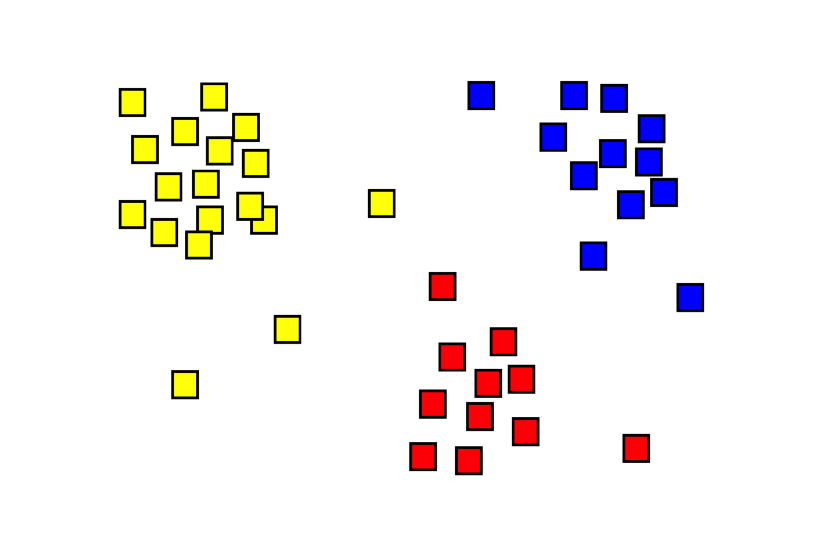

### Как читать и строить дендрограммы

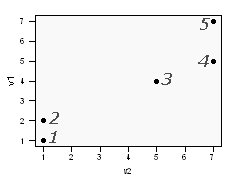

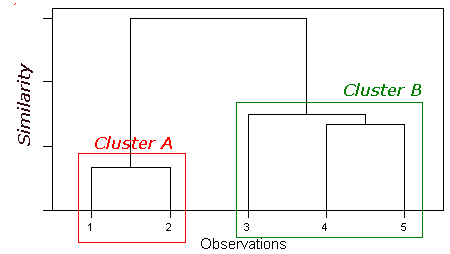

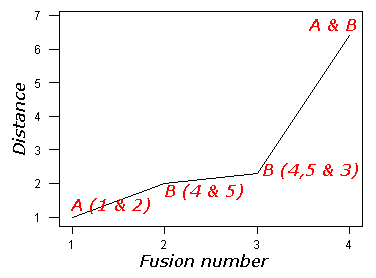

### Когда остановиться:

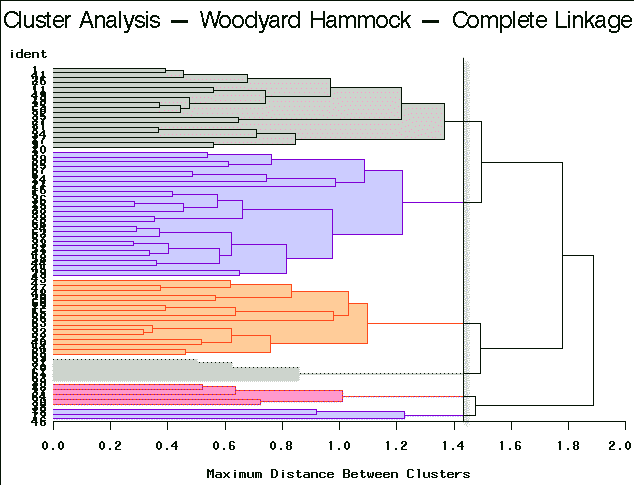

### Расстояние между кластерами

* **Среднее невзвешенное расстояние (Average linkage clustering) - для плотных облачков точек**
* Центроидный метод (Centroid Method)
* Метод дальнего соседа, максимального расстояния (Complete linkage clustering)
* **Метод ближайшего соседа (Single linkage clustering) - для кластеров в виде линий**
* **Метод Варда (Ward's method)**

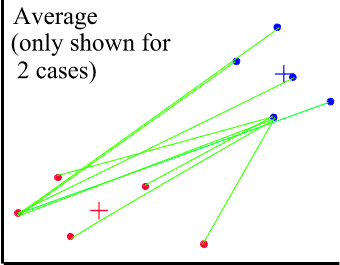

Для плотных облачков точек пододит Среднее невзвешенное расстояние, Вард

Для линий - Метод ближайшего соседа

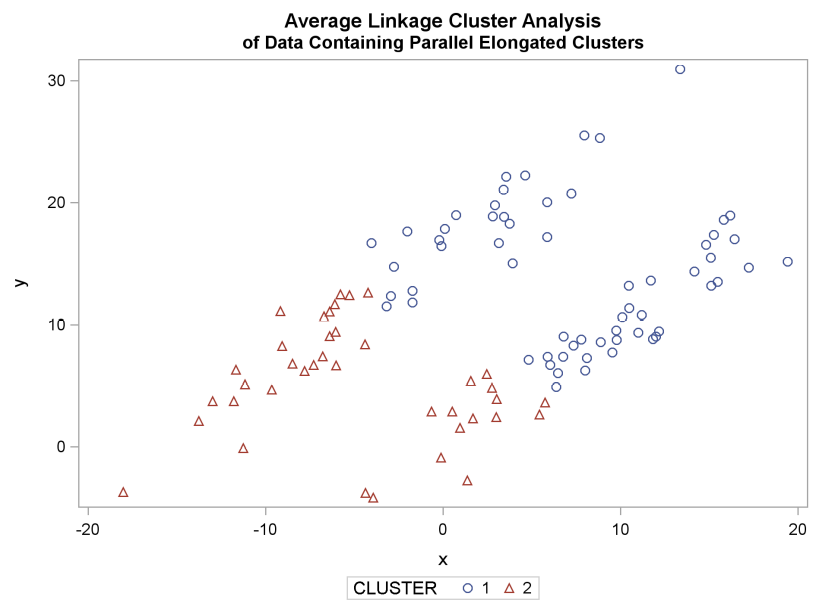

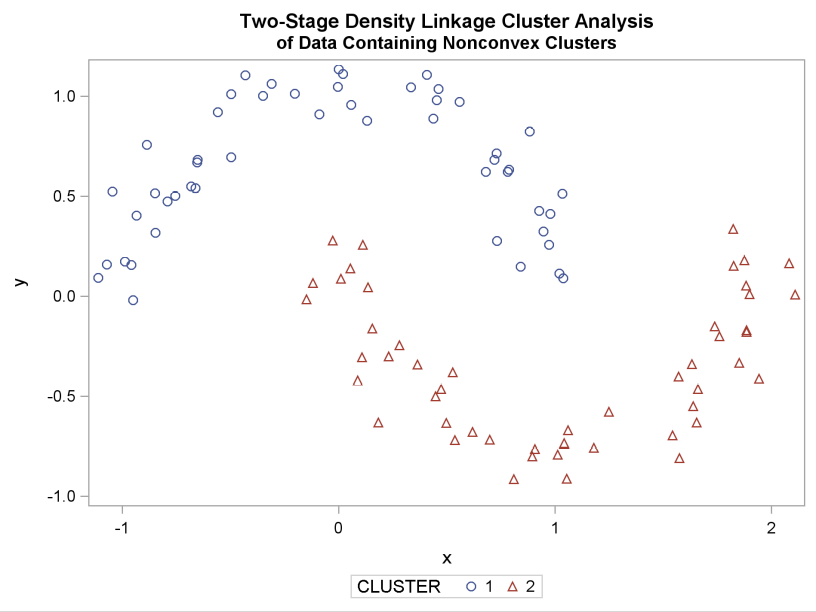

## Когда кластерный анализ прошел успешно:
* когда вы смогли понять и проинтерпретировать результат!

Проблемы:
* если в ваших данных нет кластеров, они все равно будут найдены кластерным анализом

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/AnnSenina/Other/main/beverage_r.csv", sep=";", index_col='numb.obs')
df

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0
6,1,0,0,0,1,1,0,0
7,0,1,1,1,0,0,1,0
8,1,1,0,0,1,1,0,1
9,1,1,0,0,0,1,1,1


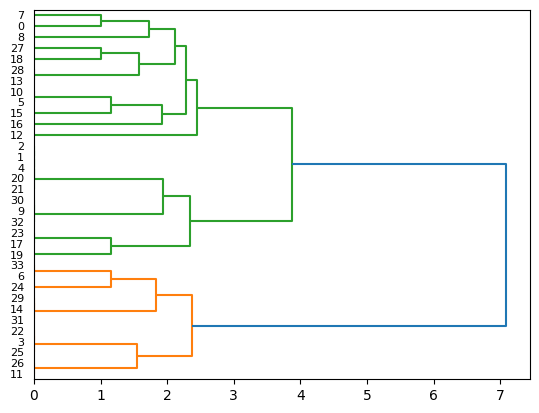

In [ ]:
link = linkage(df, 'ward', 'euclidean')
dn = dendrogram(link, orientation = "right")

Важно! Цветовая раскраска - увы, не главный показатель!

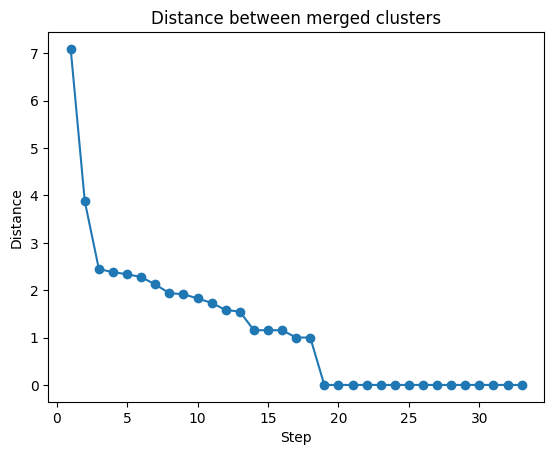

In [ ]:
# каменистая осыпь
dist = link[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)

plt.title('Distance between merged clusters')
plt.plot(idxs, dist_rev, marker='o')
plt.xlabel('Step')
plt.ylabel('Distance');

In [ ]:
# Останавливаем объединение, если выделили n кластеров (в данном случае три)
df['cluster'] = fcluster(link, 3, criterion='maxclust')
df

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP,cluster
numb.obs,,,,,,,,,
1,1,0,0,0,1,1,0,1,3
2,1,0,0,0,1,0,0,0,2
3,1,0,0,0,1,0,0,0,2
4,0,1,0,1,0,0,1,0,1
5,1,0,0,0,1,0,0,0,2
6,1,0,0,0,1,1,0,0,3
7,0,1,1,1,0,0,1,0,1
8,1,1,0,0,1,1,0,1,3
9,1,1,0,0,0,1,1,1,3


In [ ]:
df['cluster'].value_counts()

cluster
3    12
2    11
1    11
Name: count, dtype: int64

In [ ]:
df.groupby('cluster').mean()
# интерпретируем!

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
1,0.00,1.000000,0.545455,0.545455,0.000000,0.000000,0.909091,0.000000
2,1.00,0.272727,0.090909,0.000000,1.000000,0.000000,0.000000,0.272727
3,0.75,0.250000,0.083333,0.083333,0.416667,0.916667,0.083333,0.500000


## Другой метод - k-means

В scikit-learn процедура настройки и использования моделей часто проходит по одной и той же схеме:

* Инициализация модели, задание её параметров,

* Подгонка модели (метод fit и/или fit_transform),

* Предсказание для новых наблюдений (метод predict).

Для кластеризации методом k-means необходимо задать k наперёд. Попробуем k = 2.

In [ ]:
df.head() # давайте уберем столбец с кластером, полученным прошлым способом

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP,cluster
numb.obs,,,,,,,,,
1,1,0,0,0,1,1,0,1,3
2,1,0,0,0,1,0,0,0,2
3,1,0,0,0,1,0,0,0,2
4,0,1,0,1,0,0,1,0,1
5,1,0,0,0,1,0,0,0,2


In [ ]:
df.columns[:-1]

Index(['COKE', 'D_COKE', 'D_PEPSI', 'D_7UP', 'PEPSI', 'SPRITE', 'TAB',
       'SEVENUP'],
      dtype='object')

In [ ]:
df = df[df.columns[:-1]]
df.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


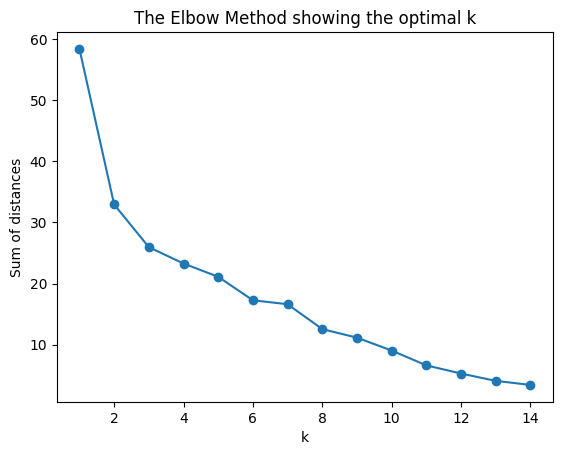

In [ ]:
K = range(1, 15)
models = [KMeans(n_clusters=k, n_init='auto').fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k');

In [ ]:
# инициализация модели
model = KMeans(n_clusters=3, n_init='auto')
model.fit(df)

KMeans(n_clusters=3, n_init='auto')

In [ ]:
# умеет предсказывать

new_items = [
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0]
]
model.predict(new_items)

# хочет видеть конкретные feature names...

In [ ]:
new = pd.DataFrame(new_items, columns=df.columns)
model.predict(new)

In [ ]:
# Результат кластеризации на данных df
df['cluster'] = model.labels_ # добавим номера кластеров в датафрейм

In [ ]:
df.groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
0,1.000000,0.375000,0.125000,0.000000,1.000000,0.000000,0.000000,0.000000
1,0.214286,0.928571,0.428571,0.428571,0.142857,0.214286,0.785714,0.214286
2,0.750000,0.083333,0.083333,0.083333,0.500000,0.666667,0.000000,0.500000


Результат очень близкий...

## DBSCAN

Кластеризация с шумом

* не требуется количество кластеров в качестве входных данных
* обнаруживает выбросы при поиске кластеров
* может выявлять кластеры сложной или случайной формы и размера

In [ ]:
df = df[df.columns[:-1]]

In [ ]:
model_dbscan = DBSCAN(eps=3, min_samples=2).fit(df)
model_dbscan.fit_predict(df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
model_dbscan = DBSCAN(eps=1, min_samples=5).fit(df) # можно также добавить гиперпараметр noise
model_dbscan.fit_predict(df)

array([ 0,  0,  0,  1,  0,  0,  1,  0, -1,  0,  0,  1, -1,  0,  1,  0, -1,
        0,  0,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  1,  0,  1])

In [ ]:
df['cluster'] = model_dbscan.labels_
df
# -1 это шумные метки

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP,cluster
numb.obs,,,,,,,,,
1,1,0,0,0,1,1,0,1,0
2,1,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,0
4,0,1,0,1,0,0,1,0,1
5,1,0,0,0,1,0,0,0,0
6,1,0,0,0,1,1,0,0,0
7,0,1,1,1,0,0,1,0,1
8,1,1,0,0,1,1,0,1,0
9,1,1,0,0,0,1,1,1,-1


In [ ]:
df.groupby('cluster').mean()
# интерпретируем!

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
-1,0.333333,0.666667,0.333333,0.333333,0.0,1.0,0.333333,0.666667
0,0.950000,0.200000,0.050000,0.000000,0.8,0.4,0.000000,0.350000
1,0.000000,1.000000,0.545455,0.545455,0.0,0.0,0.909091,0.000000


In [ ]:
df['cluster'].value_counts()

cluster
 0    20
 1    11
-1     3
Name: count, dtype: int64

In [ ]:
df

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP,cluster
numb.obs,,,,,,,,,
1,1,0,0,0,1,1,0,1,0
2,1,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,0
4,0,1,0,1,0,0,1,0,1
5,1,0,0,0,1,0,0,0,0
6,1,0,0,0,1,1,0,0,0
7,0,1,1,1,0,0,1,0,1
8,1,1,0,0,1,1,0,1,0
9,1,1,0,0,0,1,1,1,-1


In [ ]:
n_clusters_ = len(set(model_dbscan.labels_)) - (1 if -1 in model_dbscan.labels_ else 0)
n_noise_ = list(model_dbscan.labels_).count(-1)

print("Полученоое количество кластеров", n_clusters_)
print("Найдено шумных точек", n_noise_)

Полученоое количество кластеров 2
Найдено шумных точек 3


### Метрики качества

* Ближе к +1: данная точка находится далеко от ближайших кластеров (к которым она не относится);
* Ближе к 0: точка находится около границы кластеров;
* Ближе к -1: точка ближе к объектам ближайших кластеров, чем к объектам своего.

Важно! Как бы странно это ни звучало, не ориентируйтесь только на метрику - важна интерпретируемость!

In [ ]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(df, fcluster(link, 3, criterion='maxclust')):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(df, model.labels_):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(df, model_dbscan.labels_):.3f}")

Silhouette Coefficient: 0.363
Silhouette Coefficient: 0.235
Silhouette Coefficient: 0.451


### Пример посложнее

In [ ]:
country_df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/Protein%20Consumption%20in%20Europe.csv', sep=';', decimal=',', index_col='Country')
country_df

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
E_Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5


В sklearn есть несколько вариантов стандартизации. Один из самых распространенных и быстрых: StandardScalar: после масштабирования данные имеют нулевое среднее значение и единичную дисперсию

Другие: например, MinMaxScaler, normalize

[Документация](https://scikit-learn.ru/6-3-preprocessing-data/)

In [ ]:
stand = preprocessing.StandardScaler()
stand.fit(country_df)

X = stand.transform(country_df)
# x - это матрица класса numpy.ndarray
# преобразуем её в DataFrame
x = pd.DataFrame(X, index=country_df.index, columns=country_df.columns)

In [ ]:
round(x.mean(axis=0), 3)

RedMeat     -0.0
WhiteMeat    0.0
Eggs         0.0
Milk        -0.0
Fish         0.0
Cereals     -0.0
Starch       0.0
Nuts        -0.0
Fr&Veg      -0.0
dtype: float64

In [ ]:
x.std(axis=0)

RedMeat      1.020621
WhiteMeat    1.020621
Eggs         1.020621
Milk         1.020621
Fish         1.020621
Cereals      1.020621
Starch       1.020621
Nuts         1.020621
Fr&Veg       1.020621
dtype: float64

In [ ]:
x.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
Austria,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
Belgium,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
Bulgaria,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
Czechoslovakia,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


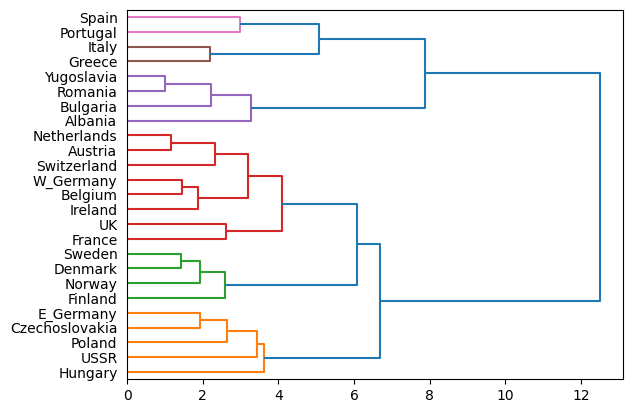

In [ ]:
link = linkage(x, 'ward', 'euclidean')
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=x.index.tolist(),
                # опция для более красивого отображения слишком ветввистой дендрограммы
                truncate_mode='lastp',
                # повернуть подписи вертикально
                color_threshold=5,
                orientation = "right",
                leaf_rotation=0.)

Text(0, 0.5, 'Distance')

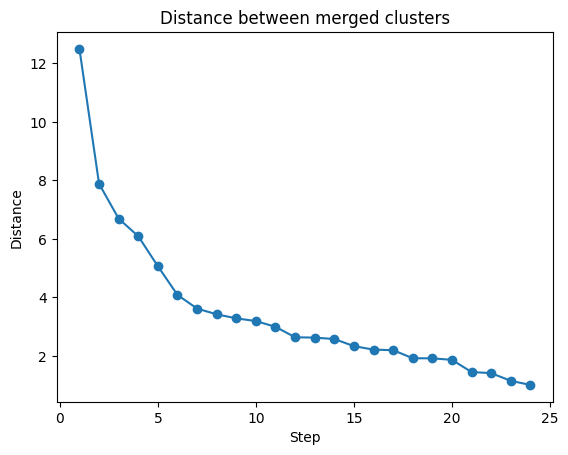

In [ ]:
# каменистая осыпь
dist = link[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)

plt.title('Distance between merged clusters')
plt.plot(idxs, dist_rev, marker='o')
plt.xlabel('Step')
plt.ylabel('Distance')

In [ ]:
country_df['cluster_1'] = fcluster(link, 6, criterion='maxclust')
country_df

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,cluster_1
Country,,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,4
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,3
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,4
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,1
Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,2
E_Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,1
Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,2
France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5,3


In [ ]:
country_df['cluster_1'].sort_values()
# Интерпретируем!

Country
Poland            1
USSR              1
Czechoslovakia    1
E_Germany         1
Hungary           1
Sweden            2
Norway            2
Denmark           2
Finland           2
Netherlands       3
W_Germany         3
France            3
UK                3
Switzerland       3
Belgium           3
Austria           3
Ireland           3
Albania           4
Yugoslavia        4
Romania           4
Bulgaria          4
Greece            5
Italy             5
Portugal          6
Spain             6
Name: cluster_1, dtype: int32

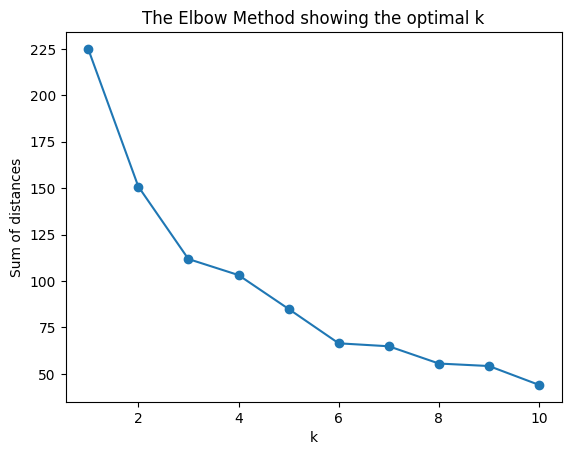

In [ ]:
K = range(1, 11)
models = [KMeans(n_clusters=k, n_init='auto').fit(x) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k');

In [ ]:
model = KMeans(n_clusters=6, n_init='auto')
model.fit(x)
country_df['cluster_2'] = model.labels_
country_df.groupby('cluster_2').mean()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,cluster_1
cluster_2,,,,,,,,,,
0,8.600000,9.475000,2.975,16.550000,5.025000,29.500000,5.500000,1.375000,4.225000,1.250000
1,10.100000,1.400000,0.500,8.900000,0.200000,42.300000,0.600000,5.500000,1.700000,4.000000
2,9.600000,4.050000,2.850,15.650000,4.650000,39.250000,2.150000,6.050000,6.600000,5.000000
3,12.336364,9.872727,3.800,22.972727,4.563636,24.118182,4.618182,1.781818,3.563636,2.727273
4,6.600000,6.860000,1.860,11.040000,1.220000,49.180000,3.520000,4.700000,3.460000,2.800000
5,6.650000,3.550000,2.100,6.750000,10.600000,28.100000,5.800000,5.300000,7.550000,6.000000


In [ ]:
country_df['cluster_2'].sort_values()

Country
Poland            0
Norway            0
Czechoslovakia    0
E_Germany         0
Albania           1
Greece            2
Italy             2
Finland           3
UK                3
Switzerland       3
Sweden            3
Denmark           3
Belgium           3
Austria           3
W_Germany         3
Ireland           3
France            3
Netherlands       3
Romania           4
Hungary           4
Bulgaria          4
USSR              4
Yugoslavia        4
Portugal          5
Spain             5
Name: cluster_2, dtype: int32

In [ ]:
# аналогично страны:

model_dbscan = DBSCAN(eps=3, min_samples=2).fit(x) # x - стандартизированный country_df
model_dbscan.fit_predict(x)
# все слипаются в один кластер

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
model_dbscan = DBSCAN(eps=2, min_samples=2).fit(x) # x - стандартизированный country_df
model_dbscan.fit_predict(x)

array([-1,  0,  0,  1,  0,  2,  0, -1, -1, -1, -1,  0, -1,  0,  2, -1, -1,
        1, -1,  2,  0,  0, -1,  0,  1])

In [ ]:
country_df['cluster_3'] = model_dbscan.labels_
country_df

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,cluster_1,cluster_2,cluster_3
Country,,,,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,4,1,-1
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,3,3,0
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,3,3,0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,4,4,1
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,1,0,0
Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,2,3,2
E_Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,1,0,0
Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,2,3,-1
France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5,3,3,-1


In [ ]:
country_df['cluster_3'].sort_values()

Country
Albania          -1
USSR             -1
Spain            -1
Portugal         -1
Poland           -1
Hungary          -1
Greece           -1
France           -1
Italy            -1
Finland          -1
E_Germany         0
Ireland           0
W_Germany         0
Netherlands       0
Czechoslovakia    0
Belgium           0
Switzerland       0
UK                0
Austria           0
Bulgaria          1
Romania           1
Yugoslavia        1
Denmark           2
Norway            2
Sweden            2
Name: cluster_3, dtype: int64

In [ ]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(x, fcluster(link, 6, criterion='maxclust')):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(x, model.labels_):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(x, model_dbscan.labels_):.3f}")

Silhouette Coefficient: 0.273
Silhouette Coefficient: 0.135
Silhouette Coefficient: 0.122


Какие еще метрики качества есть:

rand_score, adjusted_rand_score, homogeneity_completeness_v_measure

Почему мы их не используем: они подходят, когда мы заранее значем правильный ответ...(=какие конкретно "кучки" должны были получиться)) у нас его нет

### Мини-практика

In [ ]:
crime

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110,Wyoming,2015,586107,1902.6,300.6,1500.9,101.0,222.1,179.8,2.7,...,10.1,11151,1762,8797,592,1302,1054,16,173,59
3111,Wyoming,2016,585501,1957.3,302.5,1518.2,136.6,244.2,195.7,3.4,...,10.1,11460,1771,8889,800,1430,1146,20,205,59
3112,Wyoming,2017,579315,1830.4,275.0,1421.0,134.5,237.5,176.4,2.6,...,13.1,10604,1593,8232,779,1376,1022,15,263,76
3113,Wyoming,2018,577737,1785.1,264.0,1375.9,145.2,212.2,150.6,2.3,...,17.3,10313,1525,7949,839,1226,870,13,243,100


In [ ]:
crime = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/state_crime.csv')
crime.groupby('State').median()

,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
State,,,,,,,,,,,,,,,,,,,,
Alabama,1989.5,4103500.0,3566.70,977.15,2308.60,265.05,435.60,279.75,9.95,29.15,104.75,156506.0,42456.5,100935.5,10914.0,19567.5,11927.0,405.0,1286.0,4629.5
Alaska,1989.5,542021.5,3744.20,695.35,2662.45,455.00,593.75,401.75,8.40,72.30,85.75,22576.0,3920.0,15861.0,2470.0,3077.0,2118.0,41.0,410.5,480.5
Arizona,1989.5,3610614.0,5539.20,1188.45,3535.25,439.05,510.00,322.45,7.50,34.65,137.60,207349.0,53791.5,149052.5,17111.5,22873.0,15541.5,292.5,1407.0,5740.5
Arkansas,1989.5,2393500.0,3481.00,957.25,2270.75,194.50,425.10,305.50,8.05,31.95,78.95,91749.5,23010.0,61174.5,5581.0,11122.5,7790.5,188.5,779.5,1912.5
California,1989.5,29411510.5,4294.70,1164.95,2555.65,635.60,572.70,319.05,6.85,34.15,198.45,1185550.0,288099.0,695103.0,166427.5,180857.0,99752.5,2188.5,9872.5,62310.0
Colorado,1989.5,3306500.0,4075.25,792.75,2760.15,409.40,375.75,233.75,4.65,42.30,87.60,157179.0,32036.0,107674.0,13664.0,15436.0,9733.5,176.0,1495.0,3541.5
Connecticut,1989.5,3255500.0,3061.00,745.00,1894.35,386.35,294.35,150.20,3.30,20.15,118.65,98889.0,23065.0,65166.5,12769.5,10136.5,5185.0,112.5,691.0,4034.5
Delaware,1989.5,669584.0,3864.60,849.30,2484.90,338.60,490.25,310.20,5.10,36.10,137.90,28845.5,6366.0,20356.5,2345.5,3921.0,2515.0,34.5,318.0,912.0
District of Columbia,1989.5,631661.5,6047.40,1449.10,3790.20,824.10,1533.40,588.65,30.75,47.85,741.45,39615.5,9945.5,25266.5,5720.0,9372.5,3932.5,194.0,261.0,4481.5


In [ ]:
colnames = crime.groupby('State').median().columns[1:]

In [ ]:
res = crime.groupby('State').median()[colnames]
res

,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
State,,,,,,,,,,,,,,,,,,,
Alabama,4103500.0,3566.70,977.15,2308.60,265.05,435.60,279.75,9.95,29.15,104.75,156506.0,42456.5,100935.5,10914.0,19567.5,11927.0,405.0,1286.0,4629.5
Alaska,542021.5,3744.20,695.35,2662.45,455.00,593.75,401.75,8.40,72.30,85.75,22576.0,3920.0,15861.0,2470.0,3077.0,2118.0,41.0,410.5,480.5
Arizona,3610614.0,5539.20,1188.45,3535.25,439.05,510.00,322.45,7.50,34.65,137.60,207349.0,53791.5,149052.5,17111.5,22873.0,15541.5,292.5,1407.0,5740.5
Arkansas,2393500.0,3481.00,957.25,2270.75,194.50,425.10,305.50,8.05,31.95,78.95,91749.5,23010.0,61174.5,5581.0,11122.5,7790.5,188.5,779.5,1912.5
California,29411510.5,4294.70,1164.95,2555.65,635.60,572.70,319.05,6.85,34.15,198.45,1185550.0,288099.0,695103.0,166427.5,180857.0,99752.5,2188.5,9872.5,62310.0
Colorado,3306500.0,4075.25,792.75,2760.15,409.40,375.75,233.75,4.65,42.30,87.60,157179.0,32036.0,107674.0,13664.0,15436.0,9733.5,176.0,1495.0,3541.5
Connecticut,3255500.0,3061.00,745.00,1894.35,386.35,294.35,150.20,3.30,20.15,118.65,98889.0,23065.0,65166.5,12769.5,10136.5,5185.0,112.5,691.0,4034.5
Delaware,669584.0,3864.60,849.30,2484.90,338.60,490.25,310.20,5.10,36.10,137.90,28845.5,6366.0,20356.5,2345.5,3921.0,2515.0,34.5,318.0,912.0
District of Columbia,631661.5,6047.40,1449.10,3790.20,824.10,1533.40,588.65,30.75,47.85,741.45,39615.5,9945.5,25266.5,5720.0,9372.5,3932.5,194.0,261.0,4481.5


In [ ]:
res = res.drop(index='United States') # удалить данные по USA, оставим только штаты

In [ ]:
res # эту таблицу можно стандартизировать и выполнять кластерный анализ
# пожалуйста, проведите кластеризацию методом иерархического кластерного анализа и K средних
# добавьте в res 2 столбца: cluster_1 и claster_2 соответственно
# посчитайте коэффициент силуэта (метрика качества)

,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
State,,,,,,,,,,,,,,,,,,,
Alabama,4103500.0,3566.70,977.15,2308.60,265.05,435.60,279.75,9.95,29.15,104.75,156506.0,42456.5,100935.5,10914.0,19567.5,11927.0,405.0,1286.0,4629.5
Alaska,542021.5,3744.20,695.35,2662.45,455.00,593.75,401.75,8.40,72.30,85.75,22576.0,3920.0,15861.0,2470.0,3077.0,2118.0,41.0,410.5,480.5
Arizona,3610614.0,5539.20,1188.45,3535.25,439.05,510.00,322.45,7.50,34.65,137.60,207349.0,53791.5,149052.5,17111.5,22873.0,15541.5,292.5,1407.0,5740.5
Arkansas,2393500.0,3481.00,957.25,2270.75,194.50,425.10,305.50,8.05,31.95,78.95,91749.5,23010.0,61174.5,5581.0,11122.5,7790.5,188.5,779.5,1912.5
California,29411510.5,4294.70,1164.95,2555.65,635.60,572.70,319.05,6.85,34.15,198.45,1185550.0,288099.0,695103.0,166427.5,180857.0,99752.5,2188.5,9872.5,62310.0
Colorado,3306500.0,4075.25,792.75,2760.15,409.40,375.75,233.75,4.65,42.30,87.60,157179.0,32036.0,107674.0,13664.0,15436.0,9733.5,176.0,1495.0,3541.5
Connecticut,3255500.0,3061.00,745.00,1894.35,386.35,294.35,150.20,3.30,20.15,118.65,98889.0,23065.0,65166.5,12769.5,10136.5,5185.0,112.5,691.0,4034.5
Delaware,669584.0,3864.60,849.30,2484.90,338.60,490.25,310.20,5.10,36.10,137.90,28845.5,6366.0,20356.5,2345.5,3921.0,2515.0,34.5,318.0,912.0
District of Columbia,631661.5,6047.40,1449.10,3790.20,824.10,1533.40,588.65,30.75,47.85,741.45,39615.5,9945.5,25266.5,5720.0,9372.5,3932.5,194.0,261.0,4481.5


### Бонус

In [ ]:
import json
with open('raw.githubusercontent.com_tttdddnet_Python-Jupyter-Geo_main_us-states_covid.json', 'r', encoding='utf-8') as f: #открыли файл с данными
    text = json.load(f)

In [ ]:
import folium

m = folium.Map([37.0902, -95.7129], zoom_start=3)

choropleth = folium.Choropleth(
    geo_data=text,
    data=res,
    columns=[res.index, "cluster_1"],
    key_on="feature.properties.name",
    fill_color="RdYlGn_r"
    ).add_to(m)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

m

In [ ]:

m = folium.Map([37.0902, -95.7129], zoom_start=3)

choropleth = folium.Choropleth(
    geo_data=text,
    data=res,
    columns=[res.index, "cluster_2"],
    key_on="feature.properties.name",
    fill_color="RdYlGn_r"
    ).add_to(m)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

m

## Датасет по России

In [ ]:
russia = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/russia_crime.csv', decimal=',', sep=';')
russia

,Территория,Зарегистрировано,Раскрыто всего,Раскрываемость %,Не раскрыто,ФО
0,Белгородская область,16099,9237,62.1,5636,Центральный ФО
1,Брянская область,14082,9759,71.5,3893,Центральный ФО
2,Владимирская область,15986,7873,50.4,7736,Центральный ФО
3,Воронежская область,28302,12440,43.8,15944,Центральный ФО
4,Ивановская область,11794,6862,59.1,4755,Центральный ФО
...,...,...,...,...,...,...
81,Еврейская АО,2725,1537,55.1,1252,Дальневосточный ФО
82,Забайкальский край,18441,11287,62.1,6874,Дальневосточный ФО
83,Республика Бурятия,18932,9210,48.4,9828,Дальневосточный ФО
84,Чукотский АО,917,496,62.1,303,Дальневосточный ФО
